# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [2]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.optimizers import Adam

**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
import h5py

path = '/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5'

f1 = h5py.File(path,'r+')

X_train = f1['X_train'][:]
Y_train = f1['y_train'][:]

X_test = f1['X_test'][:]
Y_test = f1['y_test'][:]

Check the number of images in the training and the testing dataset.

In [5]:
print('X_train shape = ' + str(X_train.shape))
print('Y_train shape = ' + str(Y_train.shape))
print('X_test shape = ' + str(X_test.shape))
print('Y_test shape = ' + str(Y_test.shape))


X_train shape = (42000, 32, 32)
Y_train shape = (42000,)
X_test shape = (18000, 32, 32)
Y_test shape = (18000,)


**Observation:**

There are 42000 observation in the train dataset, and 18000 in the test dataset.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

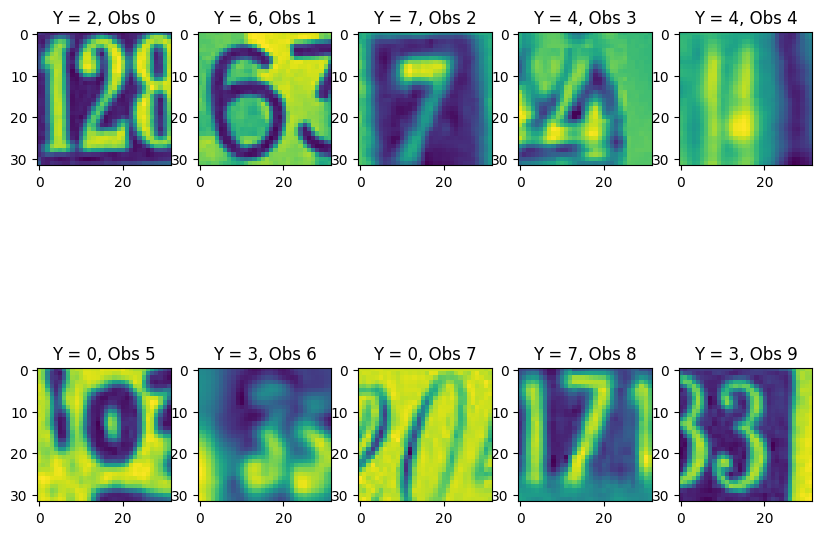

In [6]:
rows = 2
cols = 5

fig = plt.figure(figsize = (10, 8))

k = 0

for i in range(cols):
    for j in range(rows):
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_train[k, :])
        ax.set_title('Y = ' + str(Y_train[k]) + ', Obs ' + str(k))
        k= k+1
plt.show()

**Observation:**

In the titles are the values of Y and the number of the observations.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [7]:
print('The shape of the firt image in the data set is '+ str(X_train[0,:].shape))

The shape of the firt image in the data set is (32, 32)


### **Normalize the train and the test data**

In [8]:
x_train_normalized = X_train/255
x_test_normalized = X_test/255

Print the shapes of Training and Test data

In [9]:
print('x_train_normalized shape = ' + str(x_train_normalized.shape))
print('x_test_normalized shape = ' + str(x_test_normalized.shape))

x_train_normalized = x_train_normalized.reshape(42000, 1024)
x_test_normalized = x_test_normalized.reshape(18000, 1024)

print('x_train_normalized shape = ' + str(x_train_normalized.shape))
print('x_test_normalized shape = ' + str(x_test_normalized.shape))

x_train_normalized shape = (42000, 32, 32)
x_test_normalized shape = (18000, 32, 32)
x_train_normalized shape = (42000, 1024)
x_test_normalized shape = (18000, 1024)


**Observations:**

I had to reshape each observation as a vector in order to run the ANN model.

### **One-hot encode output**

In [10]:
y_train_encoded = tf.keras.utils.to_categorical(Y_train)
y_test_encoded = tf.keras.utils.to_categorical(Y_test)

**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [11]:
np.random.seed(37)
import random
random.seed(37)
tf.random.set_seed(37)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [12]:
# Initialized a sequential model
def nn_model_1():
  model = Sequential()

  model.add(Dense(64, input_shape=(1024,), activation='relu'))
  model.add(Dense(32, activation='relu'))

  model.add(Dense(10, activation = 'softmax'))

  model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
    metrics=['accuracy']
    )

  return model

model_1 = nn_model_1()
print(model_1.summary())

history_1 = model_1.fit(
            x_train_normalized, y_train_encoded,
            epochs = 20,
            validation_split = 0.2,
            shuffle = True,
            batch_size=128,
            verbose = 1
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
263/263 [==============================] - 6s 13ms/step - loss: 2.3007 - accuracy: 0.1185 - val_loss: 2.2858 - val_accuracy: 0.1271
Epoch 2/20
263/263 [==============================] - 3s 13ms/step - loss: 2.2556 - accuracy: 0.1690 - val_loss: 2.2184 - val_accuracy: 0.2194
Epoch 3/20
263/263 [=====

### **Plot the Training and Validation Accuracies and write down your Observations.**

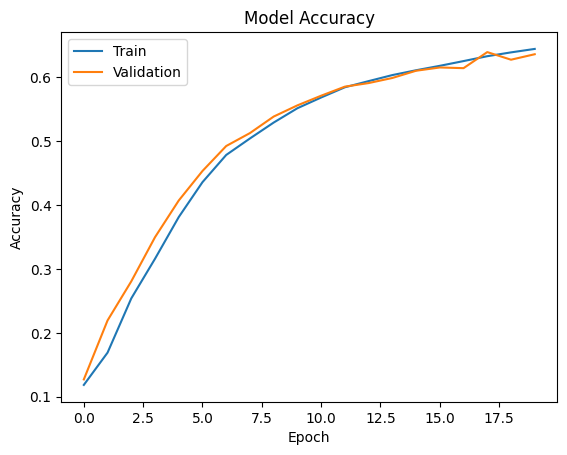

In [13]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:**

Train and test data have similar accuracy accross all epochs. However, it is quite low, reaching values around 0.65, which is not great.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [14]:
from tensorflow.keras import backend
backend.clear_session()

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [15]:
# Initialized a sequential model
def nn_model_2():
  model = Sequential()

  model.add(Dense(256, input_shape=(1024,), activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(10, activation = 'softmax'))

  model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),
    metrics=['accuracy']
    )

  return model

model_2 = nn_model_2()
print(model_2.summary())

history_2 = model_2.fit(
            x_train_normalized, y_train_encoded,
            epochs = 30,
            validation_split = 0.2,
            shuffle = True,
            batch_size=128,
            verbose = 1
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

### **Plot the Training and Validation Accuracies and write down your Observations.**

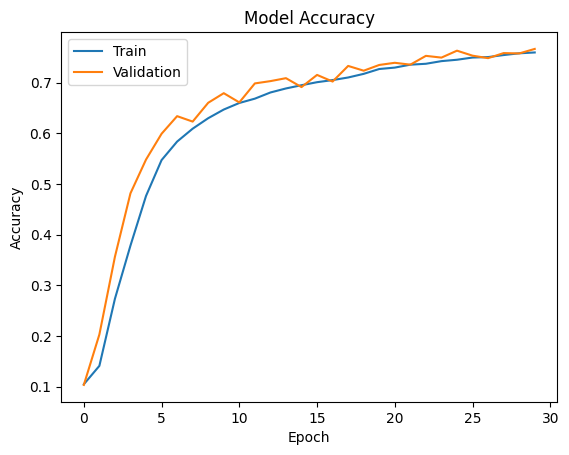

In [16]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:**

As before, train and test data behave similarly. However, the accuracy is not great, reaching almost 0.77, which is still not great.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [17]:
# Making predictions on the test data
y_pred_test = model_2.predict(x_test_normalized)
# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

# Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis = 1)


563/563 [==============================] - 2s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1814
           1       0.84      0.72      0.78      1828
           2       0.82      0.76      0.79      1803
           3       0.76      0.72      0.74      1719
           4       0.75      0.83      0.79      1812
           5       0.74      0.76      0.75      1768
           6       0.70      0.81      0.75      1832
           7       0.86      0.77      0.81      1808
           8       0.66      0.74      0.69      1812
           9       0.74      0.75      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.77      0.76      0.77     18000
weighted avg       0.77      0.76      0.77     18000



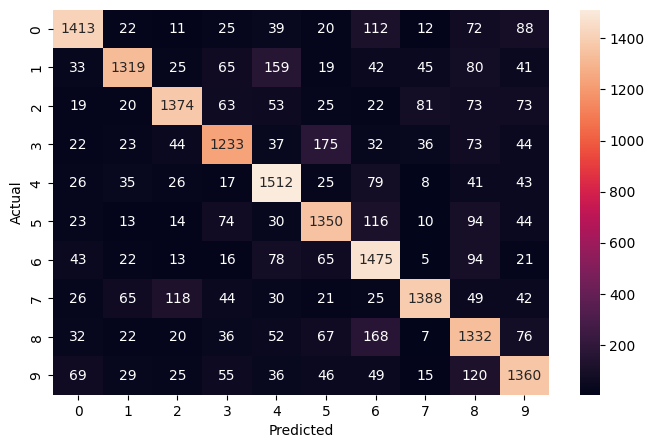

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(Y_test, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(Y_test, y_pred_test_classes)

plt.figure(figsize = (8, 5))
#sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = cifar10_classes, yticklabels = cifar10_classes)
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Display the plot
plt.show()

**Final Observations:**

From the report and the confusion matrix, we can see that the model is not performing very well. There are some variations on the performance depending on the number. For ecample, precision is higher for 7, 1, 0, 2, and is the lowest for 8. (0.66). This means that the model is better at recognicing 7,1,0,2, but very bad at recognizing 8.  On the other hand, Recall is higher in 4, 6 , 0  and 7, and lower for 1 and 3. This means that the model confuses 4,6, 0 and 7 with other numbers less frequently than how it confuses 1 and 3, for example.

Looking at the matrix, we can observe that the most common mistakes are thinking that 1 is a 4 (159 times), 3 is a 5 (175 times) 5 is a 6 (116 times), 7 is a 2 (118 times), 8 is a 6 (168 times) and that a 9 is an 8 (120 times).

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [19]:
backend.clear_session()

path = '/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5'

f1 = h5py.File(path,'r+')

X_train = f1['X_train'][:]
Y_train = f1['y_train'][:]

X_test = f1['X_test'][:]
Y_test = f1['y_test'][:]

Check the number of images in the training and the testing dataset.

In [20]:
print('Number of images in the training set: ' + str(X_train.shape[0]))
print('Number of images in the test set: ' + str(X_test.shape[0]))


Number of images in the training set: 42000
Number of images in the test set: 18000


**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Shape of the images: (32, 32)
Y = 2, Obs 0


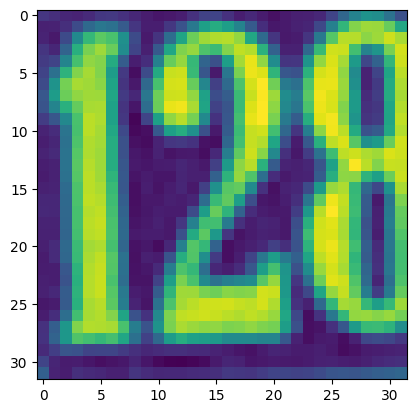

In [21]:
print('Shape of the images: ' + str(X_train[0].shape))
plt.imshow(X_train[0, :])
print('Y = ' + str(Y_train[0]) + ', Obs ' + str(0))
plt.show()

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [22]:
x_train =np.empty((X_train.shape[0], 32,32,1), dtype=int)
x_test = np.empty((X_test.shape[0], 32,32,1), dtype=int)

x_train[:,:,:, 0 ] = X_train
x_test[:,:,:, 0 ] = X_test

Normalize inputs from 0-255 to 0-1

In [23]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

Print New shape of Training and Test

In [24]:
print('x_train_normalized shape = ' + str(x_train_normalized.shape))
print('x_test_normalized shape = ' + str(x_test_normalized.shape))

x_train_normalized shape = (42000, 32, 32, 1)
x_test_normalized shape = (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [25]:
y_train_encoded = tf.keras.utils.to_categorical(Y_train)
y_test_encoded = tf.keras.utils.to_categorical(Y_test)

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [26]:
np.random.seed(37)
random.seed(37)
tf.random.set_seed(37)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [27]:
def cnn_model_1():# Initialized a sequential model
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))
  model.add(LeakyReLU(0.1))

  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(0.1))

  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())

  model.add(Dense(32))
  model.add(LeakyReLU(0.1))

  model.add(Dense(10, activation = 'softmax'))

  model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
    metrics=['accuracy']
    )

  return model

model_3 = cnn_model_1()
model_3.summary()
history_3 = model_3.fit(

            x_train_normalized, y_train_encoded,

            epochs = 20,

            validation_split = 0.2,

            batch_size=32,

            shuffle = True,

            verbose = 1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

### **Plot the Training and Validation Accuracies and Write your observations.**

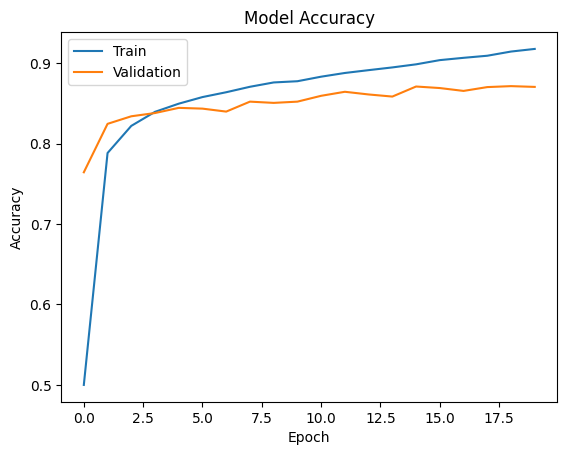

In [28]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**

The performance of the model has increased notably. However, there are some differences between the performance in both dataset.  

It is important to notice that the new model takes considerable more time than the previous models, but the increase in accuracy is probably worth it. (from 0.76 to 0.87)

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [29]:
backend.clear_session()

np.random.seed(37)
random.seed(37)
tf.random.set_seed(37)



### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [30]:
def cnn_model_2():# Initialized a sequential model

  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))
  model.add(LeakyReLU(0.1))

  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(0.1))

  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(0.1))

  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(0.1))

  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(32))
  model.add(LeakyReLU(0.1))

  model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'softmax'))

  model.compile(

    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),

    metrics=['accuracy']
    )

  return model

model_4 = cnn_model_2()
model_4.summary()

history_4 = model_4.fit(

            x_train_normalized, y_train_encoded,
            epochs = 30,
            validation_split = 0.2,
            batch_size=128,
            shuffle = True,
            verbose = 1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

### **Plot the Training and Validation accuracies and write your observations.**

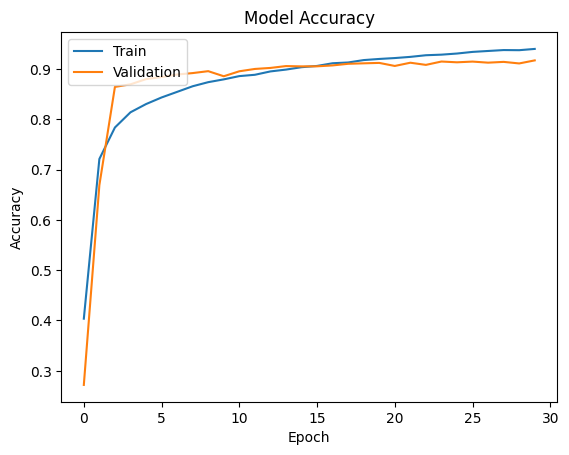

In [31]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()


**Observations:**

The performance of the model has increased a lot, and now  the train and test dataset seem to behave similarly. The only cost is that this model takes much more time to compile, but the dramatic increase in accuracy is probably worth it. Now we are over 0.9.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [35]:
y_pred_test = model_4.predict(x_test_normalized)

y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

y_pred_test_max_probas = np.max(y_pred_test, axis = 1)


563/563 [==============================] - 27s 48ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1814
           1       0.90      0.92      0.91      1828
           2       0.93      0.92      0.93      1803
           3       0.91      0.88      0.89      1719
           4       0.92      0.93      0.93      1812
           5       0.89      0.91      0.90      1768
           6       0.91      0.89      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.90      0.90      0.90      1812
           9       0.91      0.90      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



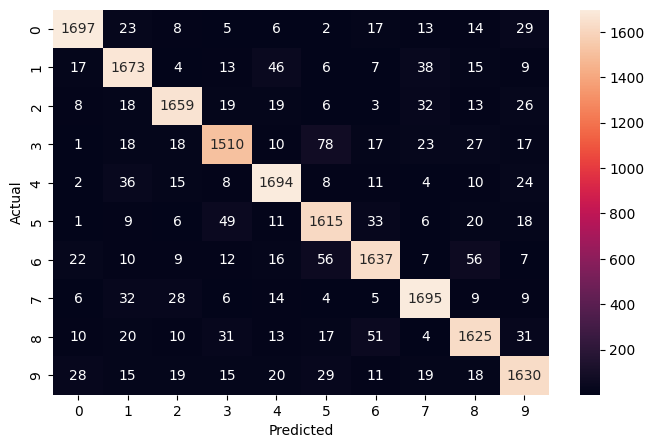

In [36]:
print(classification_report(Y_test, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(Y_test, y_pred_test_classes)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')


plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

The last model, which is more complex, performs much better. Checking at precision and recall most are above 0.9. The only exceptions are precision for 5 and recall for 3. This means that the model performs the worts when recognizing 5 among true 5, and asigning 3 to other numbers.

From the matrix, the most common mistakes are thatthe model predicts 4 when 1 46 times, 5 when  3 78 times, 3 when 5 49 times, 5 when 6 56 times, 8 when 6 56 times and 6 when 8 51 times. Most other combinations are not common.